In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import importlib

In [2]:
sns.set_style("darkgrid")

In [3]:
from Utilities import EXFOR_utilities as exfor_utils
from Utilities import ENDF_utilities as endf_utils
from Utilities import Plotting_utilities as plot_utils
importlib.reload(exfor_utils)
importlib.reload(endf_utils)
print("Finish importing scripts.")

Finish importing scripts.


In [4]:
df = exfor_utils.load_exfor("../ML_Data/working_p_xs_v2.csv")

Reading data into dataframe...
Data read into dataframe with shape:  (137679, 66)
Finished. Resulting dataset has shape  (137679, 66)


In [5]:
df.columns

Index(['Target_Meta_State', 'MT', 'Energy', 'dEnergy', 'Data', 'dData',
       'ELV/HL', 'dELV/HL', 'I78', 'EntrySubP', 'Target_Protons',
       'Product_Meta_State', 'EXFOR_Status', 'Frame', 'Reaction_Notation',
       'Title', 'Year', 'Institute', 'Date', 'Reference', 'Out',
       'Target_Neutrons', 'Target_Mass_Number', 'Target_Element',
       'Target_Flag', 'Target_Element_w_A', 'Target_Radius',
       'Prot_Nuc_Rad_Ratio', 'Target_Origin', 'Target_Mass_Excess',
       'Target_dMass_Excess', 'Target_Binding_Energy',
       'Target_dBinding_Energy', 'Target_B_Decay_Energy',
       'Target_dB_Decay_Energy', 'Target_Atomic_Mass_Micro',
       'Target_dAtomic_Mass_Micro', 'Target_S(2n)', 'Target_dS(2n)',
       'Target_S(2p)', 'Target_dS(2p)', 'Target_S(n)', 'Target_dS(n)',
       'Target_S(p)', 'Target_dS(p)', 'Compound_Neutrons',
       'Compound_Mass_Number', 'Compound_Protons', 'Compound_EL',
       'Compound_Origin', 'Compound_Mass_Excess', 'Compound_dMass_Excess',
       'Compo

In [6]:
df.shape

(137679, 66)

In [7]:
df.MT.value_counts()

9000    50723
9001    27886
4       27574
16       5602
102      4974
107      3934
17       3420
18       2996
51       2836
37       1866
3        1209
152      1058
28        982
111       558
106       464
103       316
153       270
22        208
108       136
104       127
160        87
198        70
42         49
41         45
190        43
24         41
45         41
156        30
105        28
44         23
179        21
29         10
109         8
165         6
25          5
23          5
1003        4
115         3
161         3
191         3
112         3
117         2
116         2
193         2
192         2
168         1
162         1
114         1
155         1
Name: MT, dtype: int64

In [17]:
df[df.Reaction_Notation.str.contains("P,X")]

,Target_Meta_State,MT,Energy,dEnergy,Data,dData,ELV/HL,dELV/HL,I78,EntrySubP,Target_Protons,Product_Meta_State,EXFOR_Status,Frame,Reaction_Notation,Title,Year,Institute,Date,Reference,Out,Target_Neutrons,Target_Mass_Number,Target_Element,Target_Flag,Target_Element_w_A,Target_Radius,Prot_Nuc_Rad_Ratio,Target_Origin,Target_Mass_Excess,Target_dMass_Excess,Target_Binding_Energy,Target_dBinding_Energy,Target_B_Decay_Energy,Target_dB_Decay_Energy,Target_Atomic_Mass_Micro,Target_dAtomic_Mass_Micro,Target_S(2n),Target_dS(2n),Target_S(2p),Target_dS(2p),Target_S(n),Target_dS(n),Target_S(p),Target_dS(p),Compound_Neutrons,Compound_Mass_Number,Compound_Protons,Compound_EL,Compound_Origin,Compound_Mass_Excess,Compound_dMass_Excess,Compound_Binding_Energy,Compound_dBinding_Energy,Compound_B_Decay_Energy,Compound_dB_Decay_Energy,Compound_Atomic_Mass_Micro,Compound_dAtomic_Mass_Micro,Compound_S(2n),Compound_dS(2n),Compound_S(2p),Compound_dS(2p),Compound_S(n),Compound_dS(n),Compound_S(p),Compound_dS(p)
16,All,9000,585000000.0,2.000000e+06,9.700000e-03,0.00120,0.0,0.0,Other,O0156,1,All,Other,L,"1-H-1(P,X)1-PP-0,,SIG",Measurement of cross sections and asymmetry pa...,1980,(2SWTPSI),20100704,"J.F.Crawford+ Jour. Physical Review, Part C, N...",X,0,1,H,I,1H,1.250000,0.640000,Other,7288.97061,0.00009,0.000,0.000,18244.328,289.9558,1.007825e+06,0.00009,2025.412,292.506,13771.880283,158.524008,1096.973333,256.595,0.00,0.00,1,2,1,H,Other,13135.72176,0.00011,1112.283,0.000,18244.328,289.9558,2.014102e+06,0.00012,2025.412,292.506,13771.880283,158.524008,2224.57,0.0,2224.570,0.00
17,All,9000,730000000.0,1.868734e+07,1.350000e-02,0.00073,0.0,0.0,Other,C1754,1,All,D,L,"1-H-1(P,X)1-PP-0,,SIG",Production of charged pions by 730-MeV protons...,1972,(1USALAS),20091104,"D.R.F.Cochran+ Jour. Physical Review, Part D, ...",X,0,1,H,I,1H,1.250000,0.640000,Other,7288.97061,0.00009,0.000,0.000,18244.328,289.9558,1.007825e+06,0.00009,2025.412,292.506,13771.880283,158.524008,1096.973333,256.595,0.00,0.00,1,2,1,H,Other,13135.72176,0.00011,1112.283,0.000,18244.328,289.9558,2.014102e+06,0.00012,2025.412,292.506,13771.880283,158.524008,2224.57,0.0,2224.570,0.00
18,All,9000,730000000.0,1.868734e+07,3.000000e-05,0.00001,0.0,0.0,Other,C1754,1,All,D,L,"1-H-1(P,X)1-PN-0,,SIG",Production of charged pions by 730-MeV protons...,1972,(1USALAS),20091104,"D.R.F.Cochran+ Jour. Physical Review, Part D, ...",X,0,1,H,I,1H,1.250000,0.640000,Other,7288.97061,0.00009,0.000,0.000,18244.328,289.9558,1.007825e+06,0.00009,2025.412,292.506,13771.880283,158.524008,1096.973333,256.595,0.00,0.00,1,2,1,H,Other,13135.72176,0.00011,1112.283,0.000,18244.328,289.9558,2.014102e+06,0.00012,2025.412,292.506,13771.880283,158.524008,2224.57,0.0,2224.570,0.00
166,All,9000,10000000.0,2.559910e+05,1.000000e-01,inf,0.0,0.0,Other,A0033,1,All,A,L,"1-H-2(P,X)0-NN-1,,SIG,,,EVAL",Cross sections of neutron emission in the p-d ...,1978,(4ZZZDUB),20190602,"G.I.Lykasov Rept. Joint Inst. for Nucl. Res., ...",X,1,2,H,I,2H,1.574901,0.507968,Other,13135.72176,0.00011,1112.283,0.000,18244.328,289.9558,2.014102e+06,0.00012,2025.412,292.506,13771.880283,158.524008,2224.570000,0.000,2224.57,0.00,2,3,1,H,Other,14949.80993,0.00022,2827.265,0.000,18.592,0.0000,3.016049e+06,0.00023,8481.790,0.000,13771.880283,158.524008,6257.23,0.0,1112.285,0.00
167,All,9000,20000000.0,5.119819e+05,1.180000e-01,inf,0.0,0.0,Other,A0033,1,All,A,L,"1-H-2(P,X)0-NN-1,,SIG,,,EVAL",Cross sections of neutron emission in the p-d ...,1978,(4ZZZDUB),20190602,"G.I.Lykasov Rept. Joint Inst. for Nucl. Res., ...",X,1,2,H,I,2H,1.574901,0.507968,Other,13135.72176,0.00011,1112.283,0.000,18244.328,289.9558,2.014102e+06,0.00012,2025.412,292.506,13771.880283,158.524008,2224.570000,0.000,2224.57,0.00,2,3,1,H,Other,14949.80993,0.00022,2827.265,0.000,18.592,0.0000,3.016049e+06,0.00023,8481.790,0.000,13771.880283,158.524008,6257.23,0.0,1112.285,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [7]:
# endf_all = endf_utils.load_endf("./ENDF/Chlorine_Data/endf_Cl_np_all.csv")

In [8]:
# endf_u = endf_utils.load_endf("./ENDF/Uranium_Data/endf_U_tot.csv", mev_to_ev=True)

# Exploratory Data Analysis

Let us study the dataset and analyze the distributions.

In [88]:
sns.set(font_scale = 2)

In [89]:
figure_dir = "./Figures/EXFOR_P/"

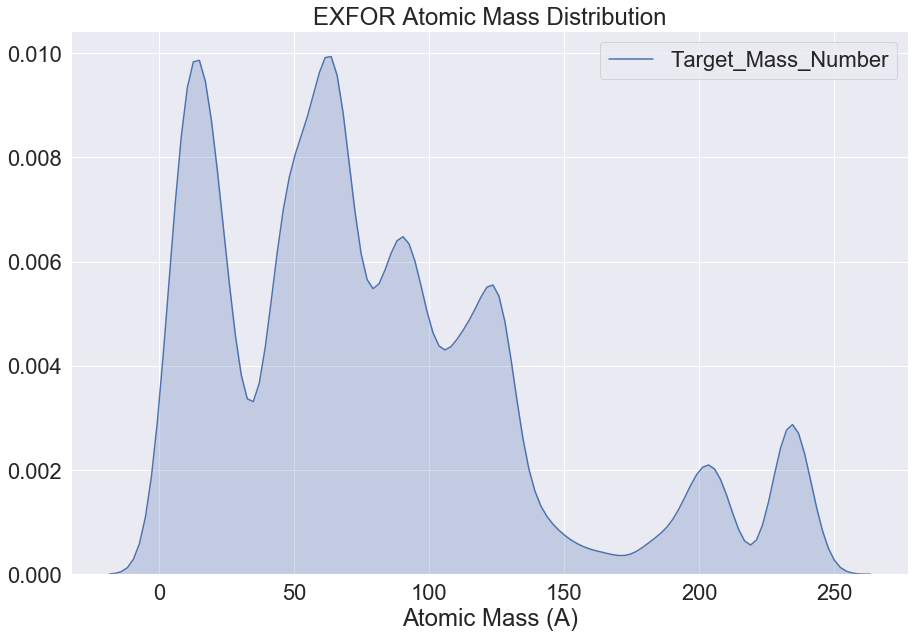

In [15]:
plot_utils.kdeplot(df.Target_Mass_Number, xlabel='Atomic Mass (A)', title='EXFOR Atomic Mass Distribution', 
                   save=True, path=figure_dir+'EXFOR_Atomic_Mass_Dist.png')

# Institute, Reaction Types, and Isotopes

We can see by the distributions that the majority of the measurments have been made at Oak Ridge National Laboratory's LINAC facility. 

The majority of the measurments in the EXFOR dataset are (n,tot) followed by (n,g) and (n,f). Other reaction types that have been measured are Inelastic and Elastic Scattering and in lesser extent (n,p) and (n,a) reaciton types.

As for Isotopes, Fe-56, Pu-239, U-235, 238U 233U Al-27 Np-237, 91Zr cover the majority of the measruments here.

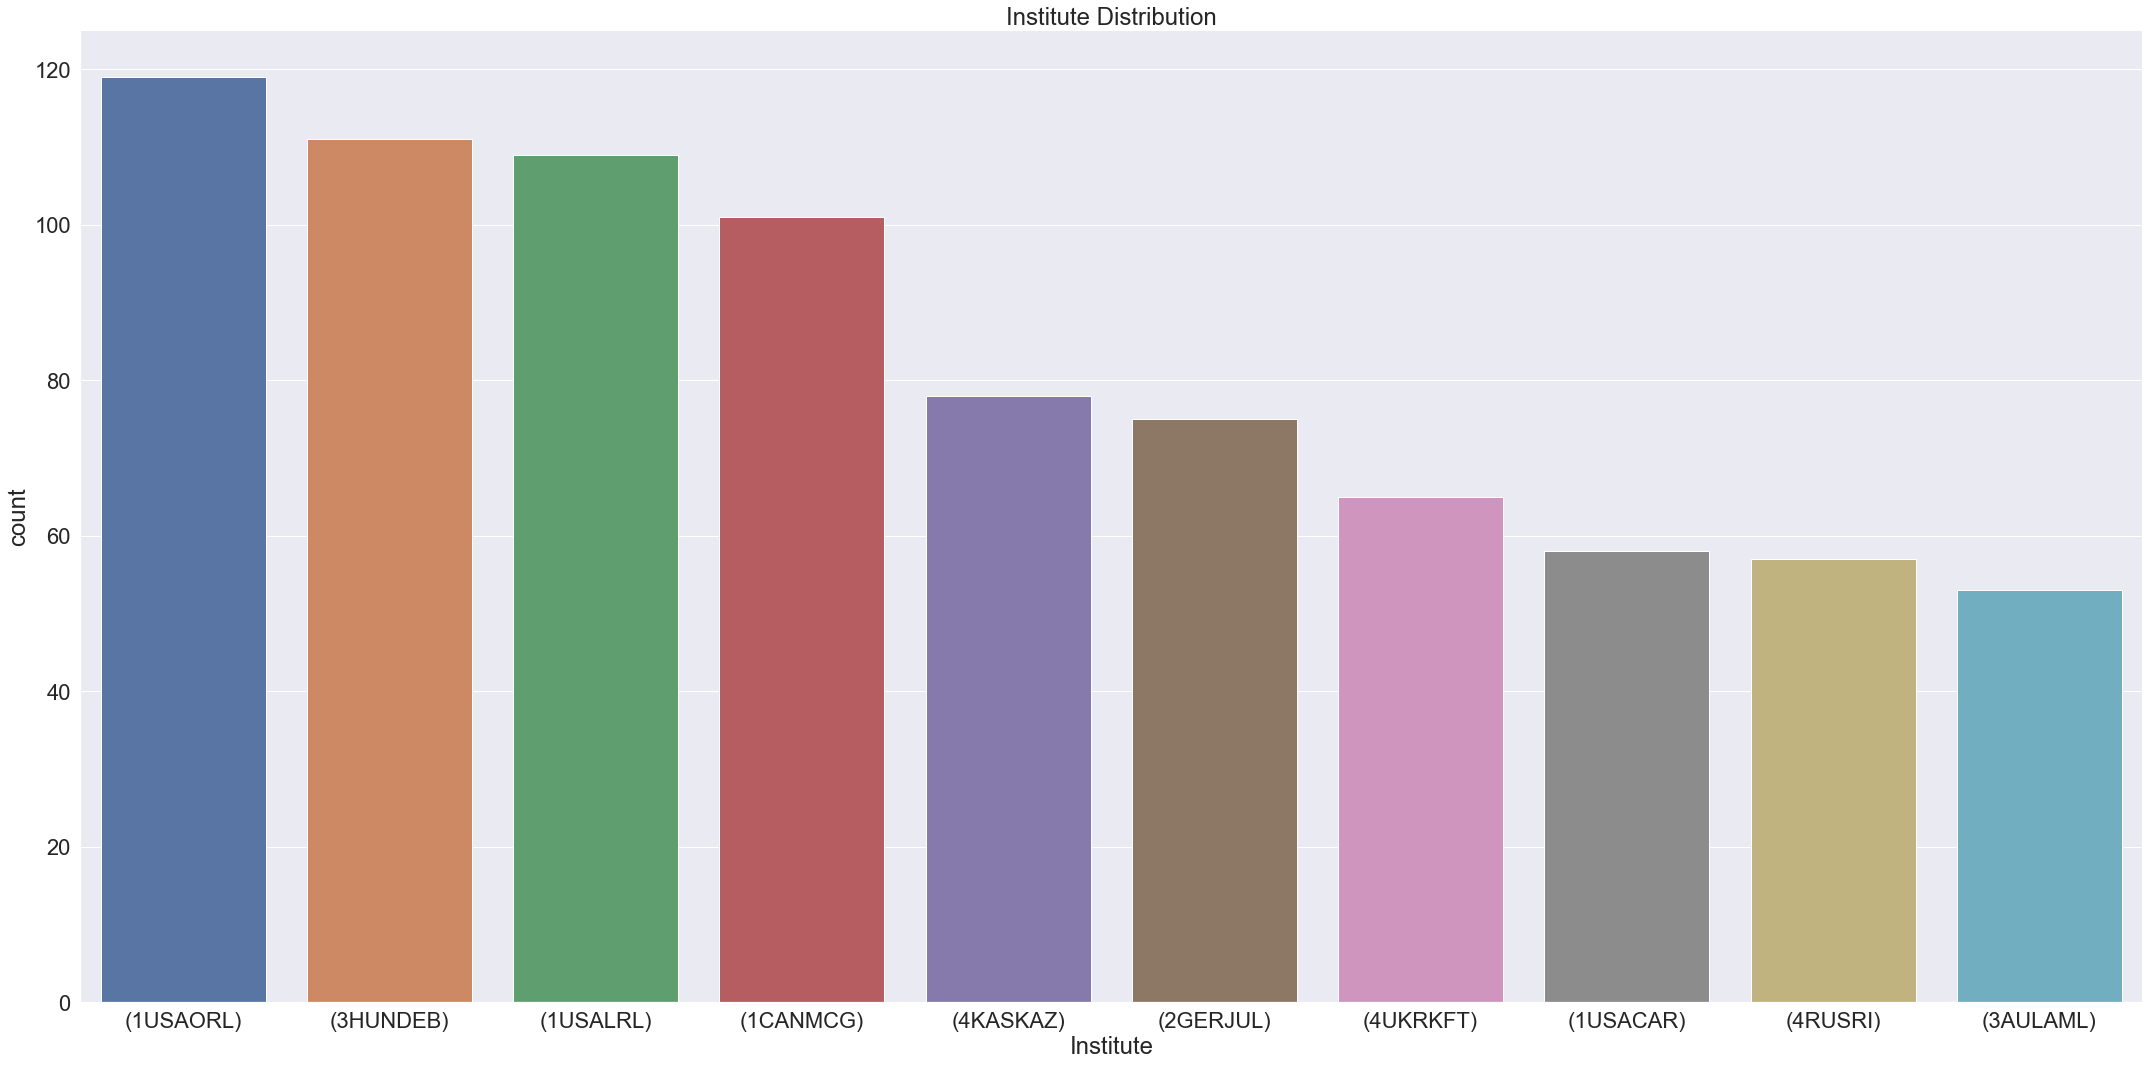

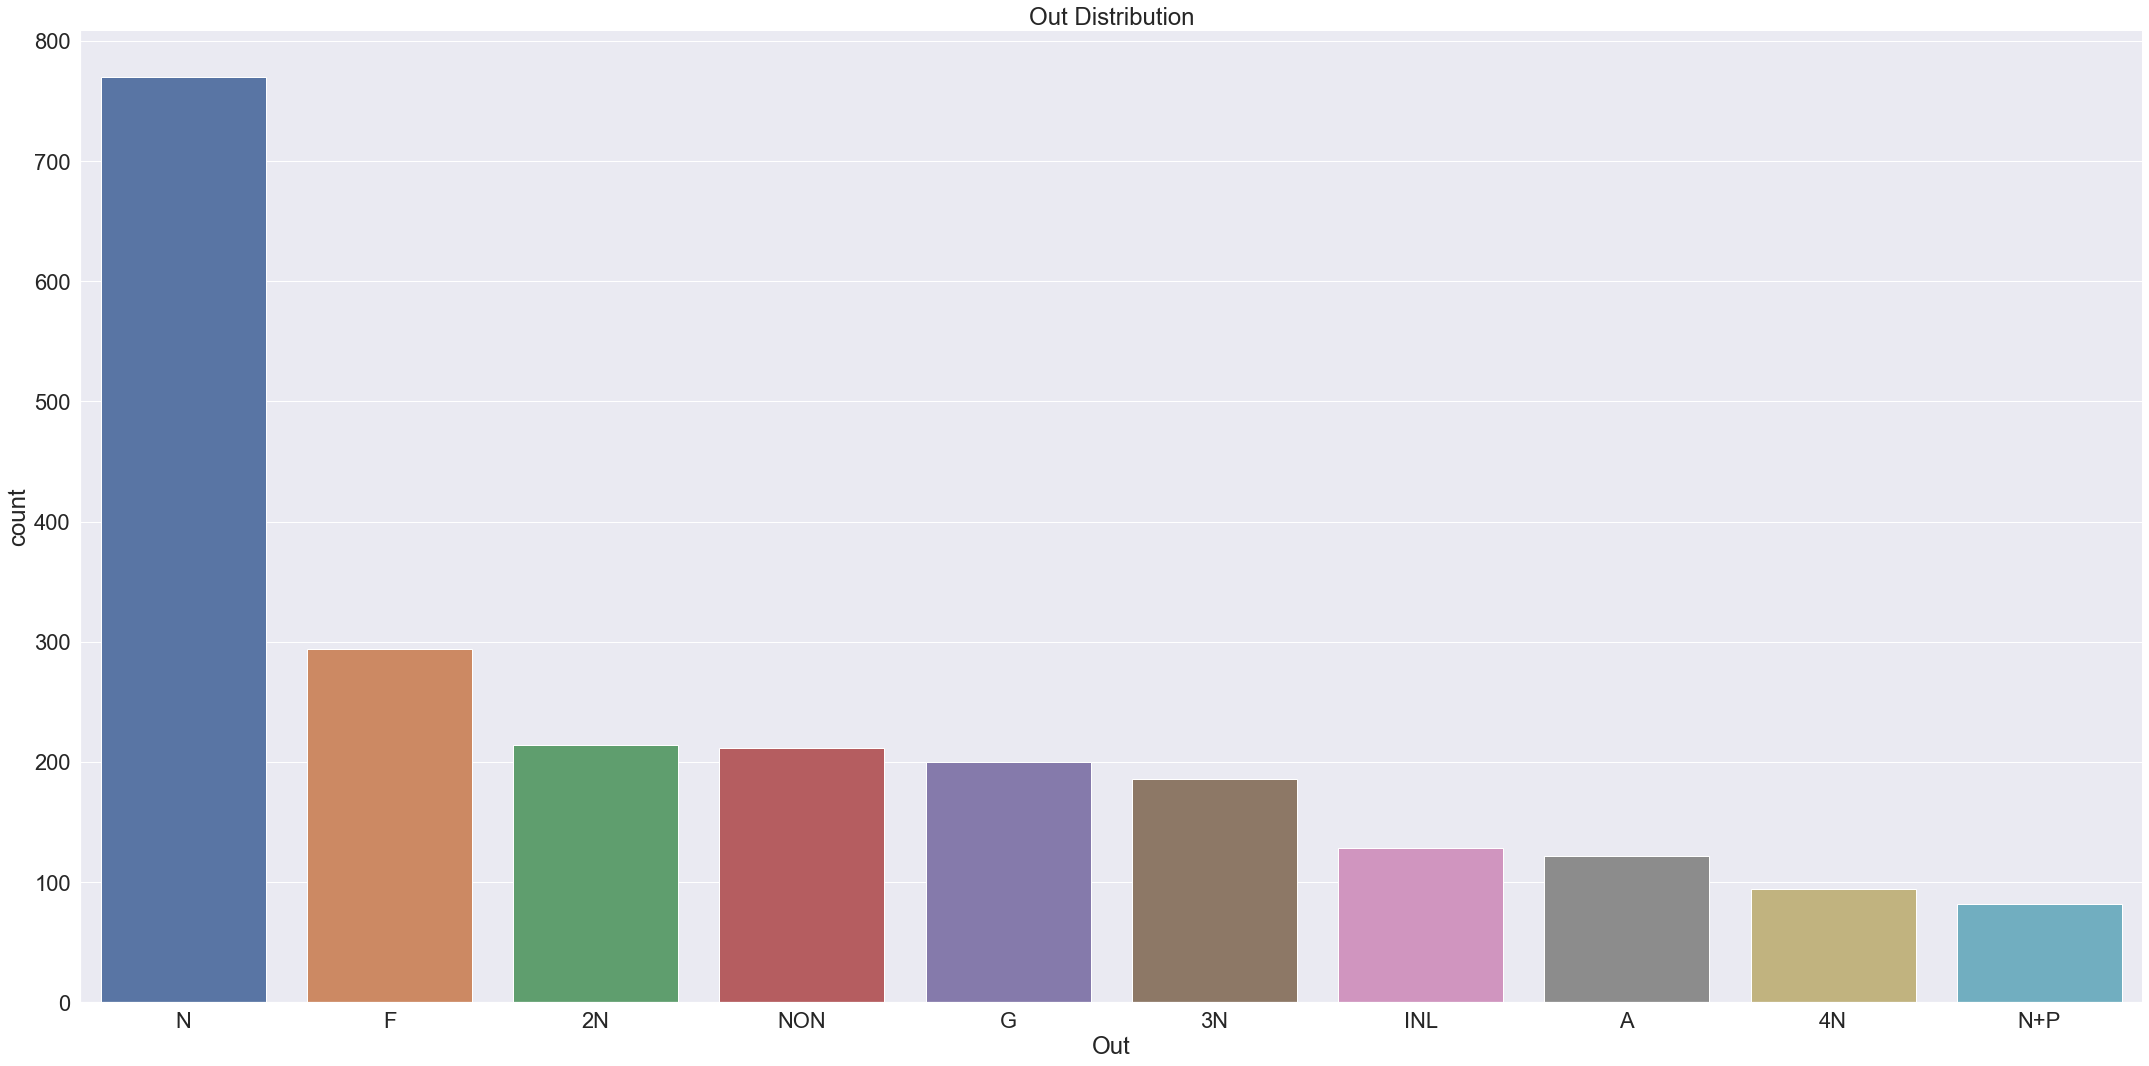

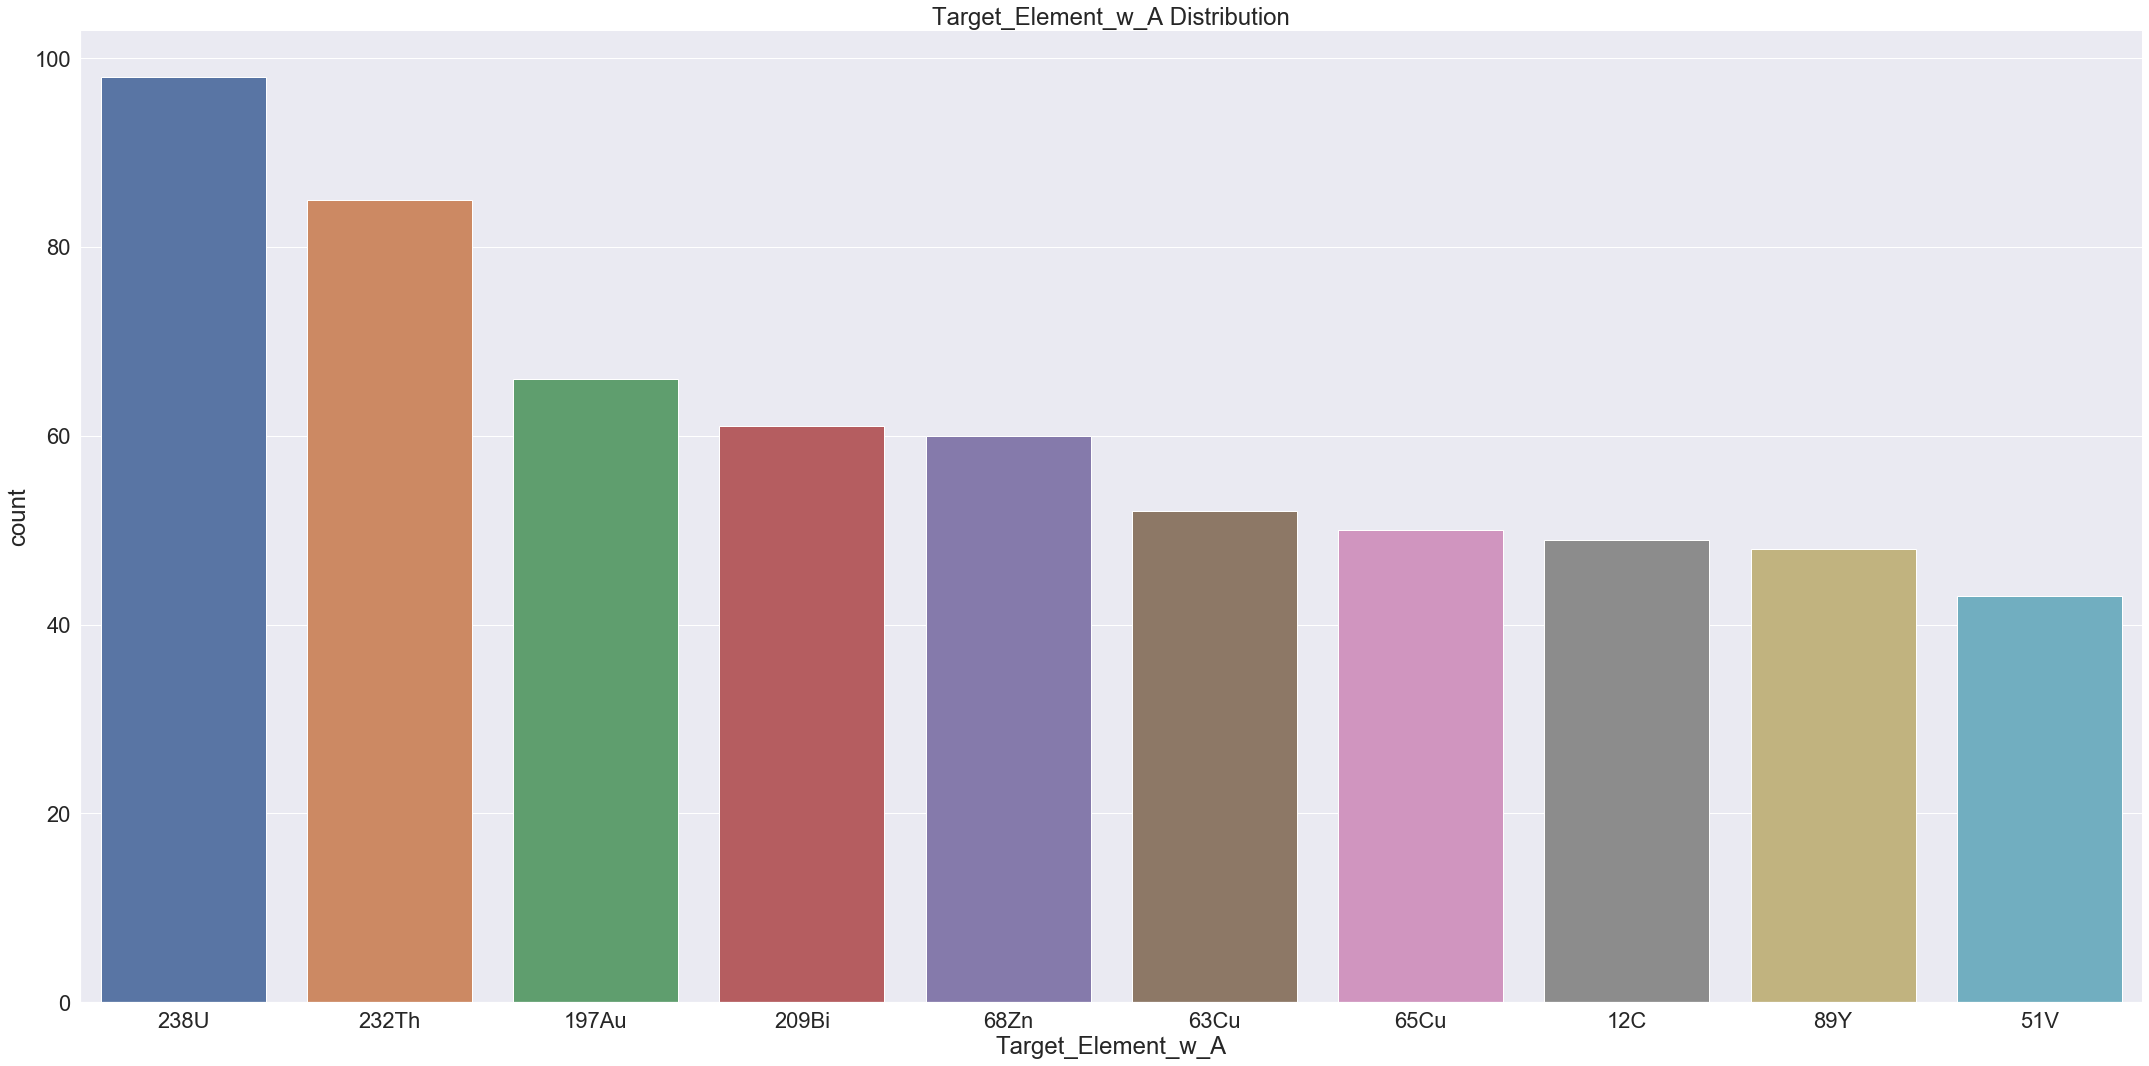

In [16]:
cat_cols_plot = ["Institute", "Out", "Target_Element_w_A"]
plot_utils.cat_plot(cat_cols_plot, df, 'Reference', save=True, path=figure_dir + "EXFOR")

# Energy Distribution (thermal or fast measruments?), Year

In [17]:
sns.set(font_scale=1)

In [18]:
campaigns = df[['Year', 'Title']].groupby(['Year']).agg(['count']).reset_index().sort_values(by="Year")
campaigns.columns = ["Year", "Counts"]

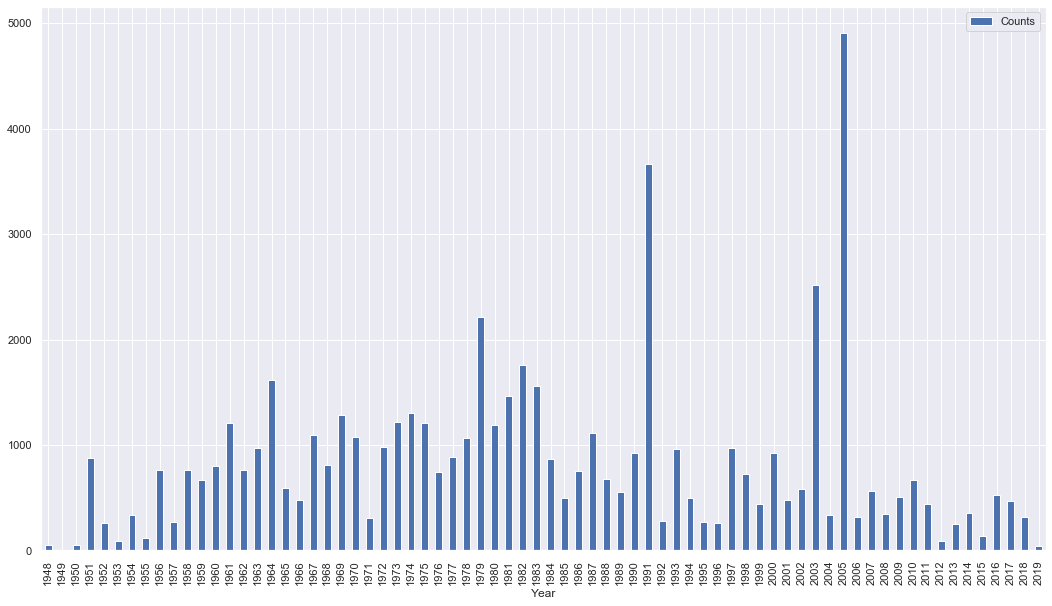

In [20]:
campaigns.plot(x="Year", y="Counts", kind='bar', figsize=(18,10))
plt.savefig(figure_dir + 'EXFOR_experiments_year.png', bbox_inches='tight')

In [21]:
sns.set(font_scale=2)

In [22]:
energy = ((df.sort_values(by="Energy").Energy) * 1E-6)
energy_l15 = energy[energy < 200]

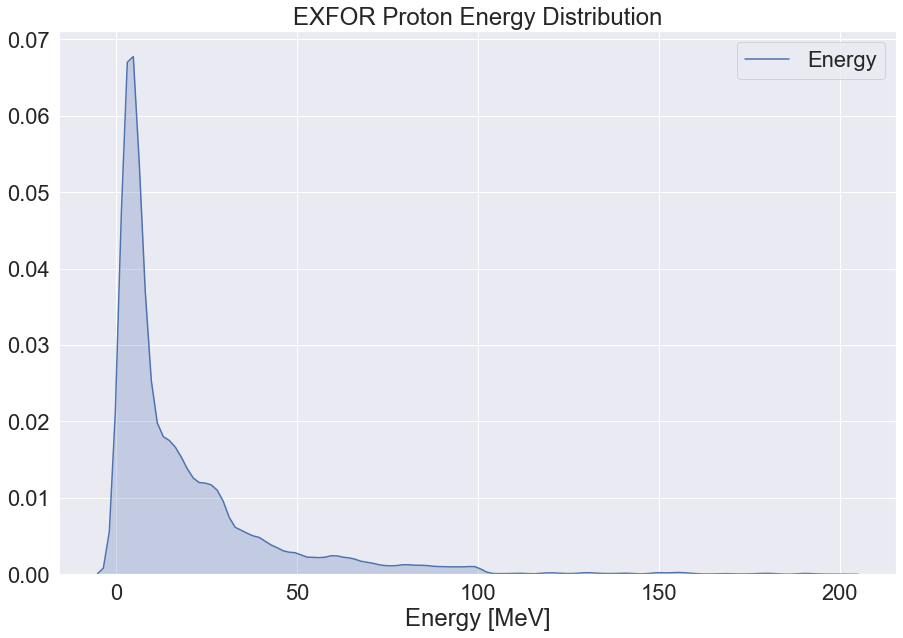

In [24]:
plot_utils.kdeplot(energy_l15, xlabel='Energy [MeV]', title='EXFOR Proton Energy Distribution', 
                   save=True, path=figure_dir+'EXFOR_Energy_Dist.png')

# Copper Energy Distribution

In [58]:
arsenic = exfor_utils.load_exfor_samples(df, 33, 75, "9001", one_hot=False)
arsenic.shape

Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (41, 66)


(41, 66)

In [61]:
copper = exfor_utils.load_exfor_samples(df, 29, 65, "4", one_hot=False)
# Get rid of last point for plotting
# copper = copper.iloc[:-1]
copper.shape

Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (919, 66)


(919, 66)

In [62]:
arsenic

,Target_Meta_State,MT,Energy,dEnergy,Data,dData,ELV/HL,dELV/HL,I78,EntrySubP,Target_Protons,Product_Meta_State,EXFOR_Status,Frame,Reaction_Notation,Title,Year,Institute,Date,Reference,Out,Target_Neutrons,Target_Mass_Number,Target_Element,Target_Flag,Target_Element_w_A,Target_Radius,Prot_Nuc_Rad_Ratio,Target_Origin,Target_Mass_Excess,Target_dMass_Excess,Target_Binding_Energy,Target_dBinding_Energy,Target_B_Decay_Energy,Target_dB_Decay_Energy,Target_Atomic_Mass_Micro,Target_dAtomic_Mass_Micro,Target_S(2n),Target_dS(2n),Target_S(2p),Target_dS(2p),Target_S(n),Target_dS(n),Target_S(p),Target_dS(p),Compound_Neutrons,Compound_Mass_Number,Compound_Protons,Compound_EL,Compound_Origin,Compound_Mass_Excess,Compound_dMass_Excess,Compound_Binding_Energy,Compound_dBinding_Energy,Compound_B_Decay_Energy,Compound_dB_Decay_Energy,Compound_Atomic_Mass_Micro,Compound_dAtomic_Mass_Micro,Compound_S(2n),Compound_dS(2n),Compound_S(2p),Compound_dS(2p),Compound_S(n),Compound_dS(n),Compound_S(p),Compound_dS(p)
66951,All,9001,400000000.0,5.000000e+05,0.000040,0.000001,0.0,0.0,Other,O0412,33,G,Other,L,"33-AS-75(P,X)11-NA-24-G,CUM,SIG",Systematics of Na-24 and Na-22 Production with...,1967,(1USACAR),20020902,R.G.Korteling+ Jour. Journal of Inorganic and ...,X,42,75,As,I,75As,5.271454,0.151761,Other,-73034.195,0.884,8700.874,0.012,-864.714,0.882,7.492159e+07,0.948,18224.08,3.95,17912.8,1.9,10245.46,1.91,6900.72,0.88,43,76,33,As,-n,-72291.377,0.886,8682.816,0.012,2960.573,0.886,75922392.01,0.951,17573.96,1.91,18819.7,3.12,7328.5,0.07,7723.38,0.89
66952,All,9001,400000000.0,5.000000e+05,0.000040,0.000005,0.0,0.0,Other,O0412,33,All,Other,L,"33-AS-75(P,X)11-NA-22,CUM,SIG",Systematics of Na-24 and Na-22 Production with...,1967,(1USACAR),20020902,R.G.Korteling+ Jour. Applied Radiation and Iso...,X,42,75,As,I,75As,5.271454,0.151761,Other,-73034.195,0.884,8700.874,0.012,-864.714,0.882,7.492159e+07,0.948,18224.08,3.95,17912.8,1.9,10245.46,1.91,6900.72,0.88,43,76,33,As,-n,-72291.377,0.886,8682.816,0.012,2960.573,0.886,75922392.01,0.951,17573.96,1.91,18819.7,3.12,7328.5,0.07,7723.38,0.89
66988,All,9001,540000000.0,7.891546e+06,0.001420,0.000227,0.0,0.0,Other,D0029,33,All,Other,L,"33-AS-75(P,X)23-V-48,CUM,SIG",Cross sections for reactions with 593 MeV- and...,1982,(2SWTPSI),20060702,A.Gruetter Jour. Applied Radiation and Isotope...,X,42,75,As,I,75As,5.271454,0.151761,Other,-73034.195,0.884,8700.874,0.012,-864.714,0.882,7.492159e+07,0.948,18224.08,3.95,17912.8,1.9,10245.46,1.91,6900.72,0.88,43,76,33,As,-n,-72291.377,0.886,8682.816,0.012,2960.573,0.886,75922392.01,0.951,17573.96,1.91,18819.7,3.12,7328.5,0.07,7723.38,0.89
66986,All,9001,540000000.0,7.891546e+06,0.005460,0.000872,0.0,0.0,Other,D0029,33,All,Other,L,"33-AS-75(P,X)24-CR-51,CUM,SIG",Cross sections for reactions with 593 MeV- and...,1982,(2SWTPSI),20060702,A.Gruetter Jour. Applied Radiation and Isotope...,X,42,75,As,I,75As,5.271454,0.151761,Other,-73034.195,0.884,8700.874,0.012,-864.714,0.882,7.492159e+07,0.948,18224.08,3.95,17912.8,1.9,10245.46,1.91,6900.72,0.88,43,76,33,As,-n,-72291.377,0.886,8682.816,0.012,2960.573,0.886,75922392.01,0.951,17573.96,1.91,18819.7,3.12,7328.5,0.07,7723.38,0.89
66984,All,9001,540000000.0,7.891546e+06,0.002130,0.000340,0.0,0.0,Other,D0029,33,All,Other,L,"33-AS-75(P,X)25-MN-56,CUM,SIG",Cross sections for reactions with 593 MeV- and...,1982,(2SWTPSI),20060702,A.Gruetter Jour. Applied Radiation and Isotope...,X,42,75,As,I,75As,5.271454,0.151761,Other,-73034.195,0.884,8700.874,0.012,-864.714,0.882,7.492159e+07,0.948,18224.08,3.95,17912.8,1.9,10245.46,1.91,6900.72,0.88,43,76,33,As,-n,-72291.377,0.886,8682.816,0.012,2960.573,0.886,75922392.01,0.951,17573.96,1.91,18819.7,3.12,7328.5,0.07,7723.38,0.89
66981,All,9001,540000000.0,7.891546e+06,0.001350,0.000215,0.0,0.0,Other,D0029,33,All,Other,L,"33-AS-75(P,X)26-FE-59,CUM,SIG",Cross sections for reactions with 593 MeV- and...,1982,(2SWTPSI),20060702,A.Gruetter Jour. Applied Radiation and Isotope...,X,42,75,As,I,75As,5.271454,0.151761,Other,

In [60]:
arsenic.Reaction_Notation.unique()

[33-AS-75(P,X)11-NA-24-G,CUM,SIG, 33-AS-75(P,X)11-NA-22,CUM,SIG, 33-AS-75(P,X)23-V-48,CUM,SIG, 33-AS-75(P,X)24-CR-51,CUM,SIG, 33-AS-75(P,X)25-MN-56,CUM,SIG, ..., 33-AS-75(P,X)33-AS-70,CUM,SIG, 33-AS-75(P,X)26-FE-52,CUM,SIG, 33-AS-75(P,X)32-GE-68,CUM,SIG, 33-AS-75(P,X)27-CO-62-M,CUM,SIG, 33-AS-75(P,X)29-CU-67,CUM,SIG]
Length: 25
Categories (25, object): [33-AS-75(P,X)11-NA-24-G,CUM,SIG, 33-AS-75(P,X)11-NA-22,CUM,SIG, 33-AS-75(P,X)23-V-48,CUM,SIG, 33-AS-75(P,X)24-CR-51,CUM,SIG, ..., 33-AS-75(P,X)26-FE-52,CUM,SIG, 33-AS-75(P,X)32-GE-68,CUM,SIG, 33-AS-75(P,X)27-CO-62-M,CUM,SIG, 33-AS-75(P,X)29-CU-67,CUM,SIG]

In [18]:
copper.Reaction_Notation.unique()

[29-CU-65(P,N)30-ZN-65,,SIG, 29-CU-65(P,N)30-ZN-65,,SIG,,,EXP]
Categories (2, object): [29-CU-65(P,N)30-ZN-65,,SIG, 29-CU-65(P,N)30-ZN-65,,SIG,,,EXP]

In [70]:
copper.Reaction_Notation.unique()

[29-CU-65(P,N)30-ZN-65,,SIG, 29-CU-65(P,N)30-ZN-65,,SIG,,,EXP]
Categories (2, object): [29-CU-65(P,N)30-ZN-65,,SIG, 29-CU-65(P,N)30-ZN-65,,SIG,,,EXP]

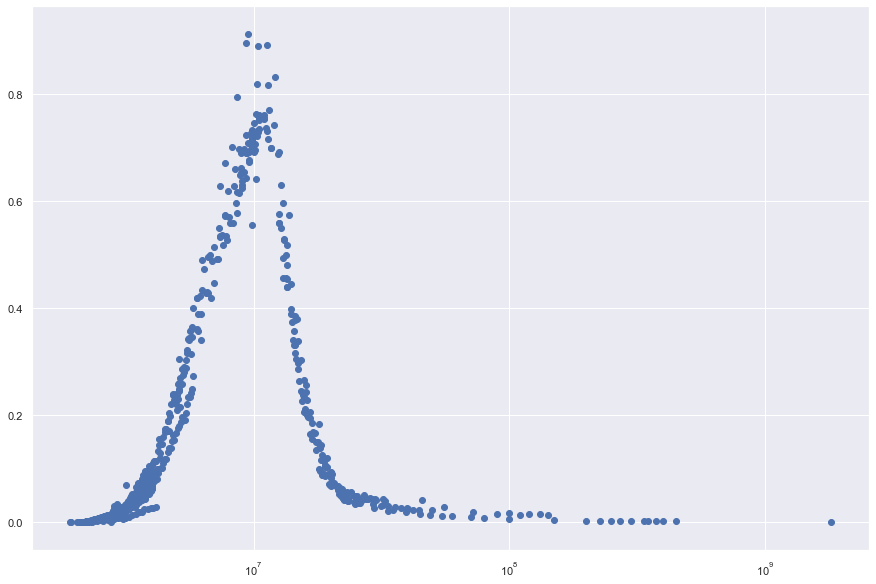

In [71]:
plt.figure(figsize=(15,10))
plt.scatter(copper.Energy, copper.Data)
# plt.xlim(0, 2.5E7)
# plt.yscale('log')
plt.xscale('log')

In [62]:
energy_cu = ((copper.sort_values(by="Energy").Energy) * 1E-6)

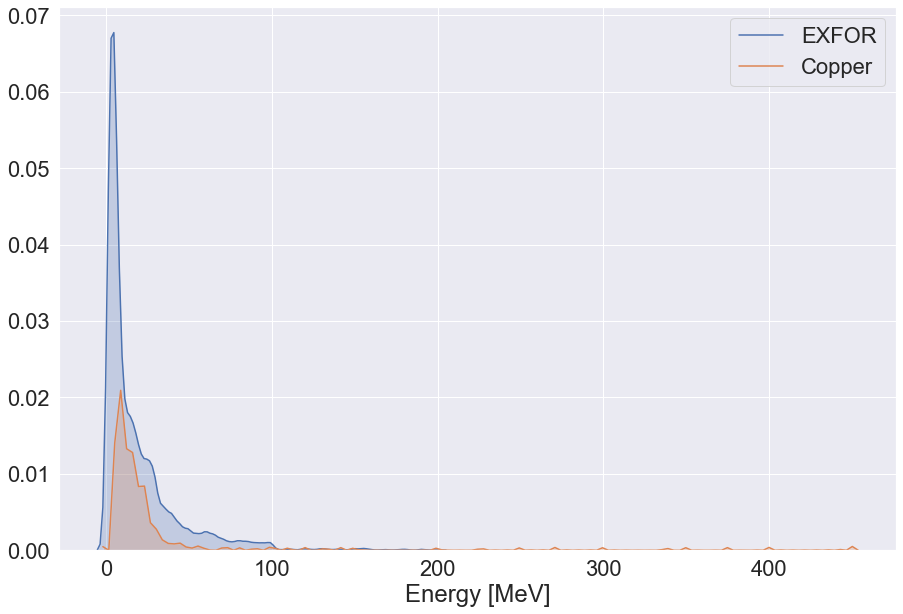

In [65]:
plot_utils.kdeplot([energy_l15, energy_cu], labels=['EXFOR', 'Copper'], 
                   save=True,
                   xlabel='Energy [MeV]', path=figure_dir + 'EXFOR_Cu_Energy_Dist.png')

In [66]:
sns.set(font_scale=1)

In [82]:
from Utilities import EXFOR_utilities as exfor_utils
from Utilities import ENDF_utilities as endf_utils
from Utilities import Plotting_utilities as plot_utils
importlib.reload(exfor_utils)
importlib.reload(endf_utils)
importlib.reload(plot_utils)
print("Finish importing scripts.")

Finish importing scripts.


Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (919, 88)


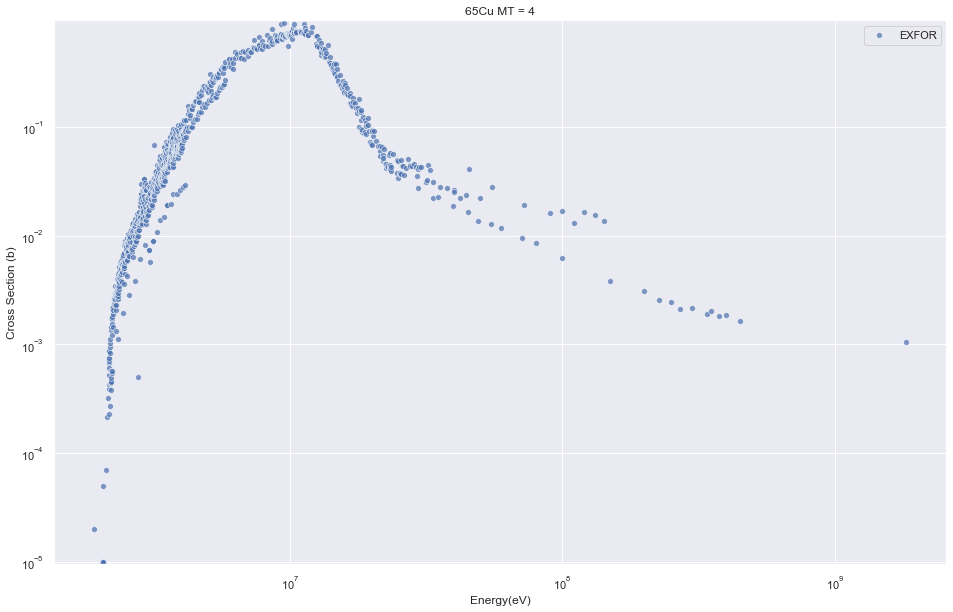

In [79]:
exfor_utils.plot_exfor_w_references(df, 29, 65, "4", nat_iso="I", error=False, save=True, 
                                    interpolate=False, legend=True, alpha=0.7, one_hot=False, 
                                    log_e=False, path=figure_dir, ref=False)

# # exfor_utils.plot_exfor_w_references(df_plotting, 17, 35, "103", nat_iso="I", new_data=new_data_nolog, endf=endf_cl_nolog, error=True, 
# #                                     save=False, interpolate=False, legend=False, alpha=0.7, one_hot=False, 
# #                                     log_e=False, path=figure_dir, ref=True)

In [78]:
# exfor_utils.plot_exfor_w_references(df, 92, 235, "MT_1", nat_iso="I", endf=endf_u, error=True, 
#                                     save=False, interpolate=False, legend=False, alpha=0.7, one_hot=True, 
#                                     log_e=True, path=figure_dir, ref=False)

# # exfor_utils.plot_exfor_w_references(df_plotting, 92, 235, "1", nat_iso="I", endf=endf_u_nolog, error=True, 
# #                                     save=False, interpolate=False, legend=False, alpha=0.7, one_hot=False, 
# #                                     log_e=False, path=figure_dir, ref=True)

# Numerical Features

Lets follow up with the Chlorine-35 (n,p) example.

In [65]:
uranium = df[(df["Target_Protons"] == 92) & (df["MT"] == 1) & (df["Target_Mass_Number"] == 235)].sort_values(
    by='Energy', ascending=False)

In [115]:
chlorine = df[(df["Target_Protons"] == 17) & (df["MT"] == 103) & (df["Target_Mass_Number"] == 35)].sort_values(by='Energy', ascending=False)

In [117]:
chlorine.describe()

,Energy,dEnergy,Data,dData,ELV/HL,dELV/HL,Target_Protons,Year,Date,Target_Neutrons,Target_Mass_Number,Target_Radius,Target_Neut_Rad_Ratio,Target_Mass_Excess,Target_dMass_Excess,Target_Binding_Energy,Target_dBinding_Energy,Target_B_Decay_Energy,Target_dB_Decay_Energy,Target_Atomic_Mass_Micro,Target_dAtomic_Mass_Micro,Target_S(2n),Target_dS(2n),Target_S(2p),Target_dS(2p),Target_S(n),Target_dS(n),Target_S(p),Target_dS(p),Compound_Neutrons,Compound_Mass_Number,Compound_Protons,Compound_Mass_Excess,Compound_dMass_Excess,Compound_Binding_Energy,Compound_dBinding_Energy,Compound_B_Decay_Energy,Compound_dB_Decay_Energy,Compound_Atomic_Mass_Micro,Compound_dAtomic_Mass_Micro,Compound_S(2n),Compound_dS(2n),Compound_S(2p),Compound_dS(2p),Compound_S(n),Compound_dS(n),Compound_S(p),Compound_dS(p)
count,2.160000e+02,216.000000,216.000000,216.000000,216.0,216.0,216.0,216.000000,2.160000e+02,216.0,216.0,2.160000e+02,2.160000e+02,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,2.160000e+02,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.0,216.0,216.0,216.000,2.160000e+02,2.160000e+02,2.160000e+02,216.000,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,216.00,216.00,2.160000e+02,2.160000e+02,216.0,2.160000e+02,2.160000e+02
mean,2.746206e+05,3331.131388,0.168940,0.010491,0.0,0.0,17.0,1984.662037,1.993674e+07,18.0,35.0,4.088833e+00,1.956549e-01,-28940.556340,0.901059,8518.131541,0.021770,-5916.991437,1.645520,3.497109e+07,0.967523,24119.670213,1.485549,17280.916168,2.250758,12626.248752,1.180578,6386.111274,1.187365,19.0,36.0,17.0,-29522.005,3.600000e-02,8.521931e+03,1.000000e-03,709.535,4.500000e-02,3.596831e+07,3.800000e-02,2.122456e+04,0.05,19551.25,8.100000e-01,8.579790e+03,0.0,7.964770e+03,3.000000e-02
std,1.958895e+06,23749.179229,0.812348,0.053155,0.0,0.0,0.0,12.371071,4.075400e+04,0.0,0.0,1.780483e-15,5.564010e-17,1072.459992,12.728416,31.546375,0.305251,723.847195,14.204891,3.294205e+04,13.661145,487.347356,16.101220,393.821631,17.059583,272.058672,16.616031,224.881885,16.862755,0.0,0.0,0.0,0.000,1.391002e-17,3.646429e-12,4.346883e-19,0.000,6.955012e-18,1.493577e-08,6.955012e-18,3.646429e-12,0.00,0.00,3.338406e-16,3.646429e-12,0.0,2.734822e-12,1.043252e-17
min,2.530000e-02,0.000261,0.000048,0.000048,0.0,0.0,17.0,1961.000000,1.992020e+07,18.0,35.0,4.088833e+00,1.956549e-01,-29013.528000,0.035000,8056.642875,0.001000,-5966.243000,0.679000,3.496885e+07,0.038000,16990.315909,0.390000,17254.120000,1.090000,8646.330435,0.050000,6370.810000,0.040000,19.0,36.0,17.0,-29522.005,3.600000e-02,8.521931e+03,1.000000e-03,709.535,4.500000e-02,3.596831e+07,3.800000e-02,2.122456e+04,0.05,19551.25,8.100000e-01,8.579790e+03,0.0,7.964770e+03,3.000000e-02
25%,1.845750e+01,0.261210,0.002100,0.000380,0.0,0.0,17.0,1991.000000,1.992020e+07,18.0,35.0,4.088833e+00,1.956549e-01,-29013.528000,0.035000,8520.278000,0.001000,-5966.243000,0.679000,3.496885e+07,0.038000,24152.830000,0.390000,17254.120000,1.090000,12644.760000,0.050000,6370.810000,0.040000,19.0,36.0,17.0,-29522.005,3.600000e-02,8.521931e+03,1.000000e-03,709.535,4.500000e-02,3.596831e+07,3.800000e-02,2.122456e+04,0.05,19551.25,8.100000e-01,8.579790e+03,0.0,7.964770e+03,3.000000e-02
50%,3.511000e+02,6.011867,0.010100,0.001350,0.0,0.0,17.0,1991.000000,1.992020e+07,18.0,35.0,4.088833e+00,1.956549e-01,-29013.528000,0.035000,8520.278000,0.001000,-5966.243000,0.679000,3.496885e+07,0.038000,24152.830000,0.390000,17254.120000,1.090000,12644.760000,0.050000,6370.810000,0.040000,19.0,36.0,17.0,-29522.005,3.600000e-02,8.521931e+03,1.000000e-03,709.535,4.500000e-02,3.596831e+07,3.800000e-02,2.122456e+04,0.05,19551.25,8.100000e-01,8.579790e+03,0.0,7.964770e+03,3.000000e-02
75%,2.382000e+03,21.926103,0.073650,0.003500,0.0,0.0,17.0,1991.000000,1.992020e+07,18.0,35.0,4.088833e+00,1.956549e-01,-29013.528000,0.035000,8520.278000,0.001000,-5966.243000,0.679000,3.496885e+07,0.038000,24152.830000,0.390000,17254.120000,1.090000,12644.760000,0.050000,6370

We can explor correlation among features but as we know beforehand, cross section do not behave linearly. Let us use the chlorine 35 n,p cross sections as an example.

In [118]:
pd.DataFrame(chlorine.corr()).sort_values(by='Data', ascending=False).head()

,Energy,dEnergy,Data,dData,ELV/HL,dELV/HL,Target_Protons,Year,Date,Target_Neutrons,Target_Mass_Number,Target_Radius,Target_Neut_Rad_Ratio,Target_Mass_Excess,Target_dMass_Excess,Target_Binding_Energy,Target_dBinding_Energy,Target_B_Decay_Energy,Target_dB_Decay_Energy,Target_Atomic_Mass_Micro,Target_dAtomic_Mass_Micro,Target_S(2n),Target_dS(2n),Target_S(2p),Target_dS(2p),Target_S(n),Target_dS(n),Target_S(p),Target_dS(p),Compound_Neutrons,Compound_Mass_Number,Compound_Protons,Compound_Mass_Excess,Compound_dMass_Excess,Compound_Binding_Energy,Compound_dBinding_Energy,Compound_B_Decay_Energy,Compound_dB_Decay_Energy,Compound_Atomic_Mass_Micro,Compound_dAtomic_Mass_Micro,Compound_S(2n),Compound_dS(2n),Compound_S(2p),Compound_dS(2p),Compound_S(n),Compound_dS(n),Compound_S(p),Compound_dS(p)
Data,0.000392,-0.001125,1.000000,0.993708,NaN,NaN,NaN,0.090526,-0.026421,NaN,NaN,1.496698e-17,7.972726e-18,0.016919,0.016919,-0.016919,0.016919,0.016919,0.016919,0.016919,0.016919,-0.016919,0.016919,0.016919,0.016919,-0.016919,0.016919,0.016919,0.016919,NaN,NaN,NaN,2.293246e-17,5.129926e-17,-3.231052e-17,-5.707747e-18,-5.707747e-18,-6.167538e-17,-2.293246e-17,-1.600121e-17,6.167538e-17,-5.707747e-18,NaN,3.230162e-17,-1.600121e-17,NaN,6.167538e-17,-1.600121e-17
dData,0.039680,0.037766,0.993708,1.000000,NaN,NaN,NaN,0.069616,-0.000872,NaN,NaN,-2.653207e-16,2.538979e-16,0.012228,0.012228,-0.012228,0.012228,0.012228,0.012228,0.012228,0.012228,-0.012228,0.012228,0.012228,0.012228,-0.012228,0.012228,0.012228,0.012228,NaN,NaN,NaN,-2.958992e-16,2.336868e-16,-2.757142e-16,-2.945989e-16,-2.945989e-16,2.980315e-16,2.958992e-16,-2.761311e-16,-2.980315e-16,-2.945989e-16,NaN,-3.117619e-16,-2.761311e-16,NaN,-2.980315e-16,-2.761311e-16
Year,-0.170847,-0.172947,0.090526,0.069616,NaN,NaN,NaN,1.000000,-0.534500,NaN,NaN,-6.823022e-15,6.823022e-15,0.117906,0.117906,-0.117906,0.117906,0.117906,0.117906,0.117906,0.117906,-0.117906,0.117906,0.117906,0.117906,-0.117906,0.117906,0.117906,0.117906,NaN,NaN,NaN,-7.662254e-15,6.033320e-15,-5.970144e-15,-6.823022e-15,-6.823022e-15,6.823022e-15,7.662254e-15,-7.229779e-15,-6.823022e-15,-6.823022e-15,NaN,-6.117976e-15,-7.229779e-15,NaN,-6.823022e-15,-7.229779e-15
Target_S(p),-0.009583,-0.009588,0.016919,0.012228,NaN,NaN,NaN,0.117906,0.308570,NaN,NaN,1.447477e-13,-1.439605e-13,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.440961e-13,-1.445214e-13,1.441558e-13,1.441196e-13,1.441196e-13,-1.443386e-13,-1.440961e-13,1.445825e-13,1.443386e-13,1.441196e-13,NaN,1.444724e-13,1.445825e-13,NaN,1.443386e-13,1.445825e-13
Target_dBinding_Energy,-0.009583,-0.009588,0.016919,0.012228,NaN,NaN,NaN,0.117906,0.308570,NaN,NaN,-1.728254e-16,1.543084e-16,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.382603e-16,-2.400352e-16,1.932915e-16,-3.150462e-16,-3.150462e-16,1.350198e-16,-1.382603e-16,-2.160317e-16,-1.350198e-16,-3.150462e-16,NaN,-5.760846e-17,-2.160317e-16,NaN,-1.350198e-16,-2.160317e-16


<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [120]:
from scipy import stats

In [121]:
pearson_coef, p_value = stats.pearsonr(chlorine['Energy'], chlorine['Data'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.00039191327732860607  with a P-value of P = 0.9954309362611046


The energy is weakley linearly correlated. The p-value results in 1% confidence that this correlation is significant. We therefore expect that a linear model will work poorly in this data. As a nuclear engineer, we know that there are depedences on Energy depending on the region. One solution could be to split the data into the appropiate energy ranges but that would defeat the purpose of this project.

In [347]:
num_columns = []
for col in list(df.columns):
    if col not in str_cols:
        num_columns.append(col)

In [330]:
fig, ax = plt.subplots(figsize=(25,30))
to_plot[num_columns].hist(ax=ax)
plt.savefig(figure_dir + 'example.svg')  
plt.close(fig)

C:\Users\Pedro\Anaconda3\envs\data_mining_gpu\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


We can see that several features are extremeley negatively skewed. This introduces problems to almost all ML algorithms as we shall demonstrate in the next notebook. 

In [331]:
from scipy.stats import skew

- skewness = 0 : normally distributed.
- skewness > 0 : more weight in the left tail of the distribution.
- skewness < 0 : more weight in the right tail of the distribution.

In [349]:
num_cols_real = []

In [350]:
num_cols_real.extend(num_columns[:17])
num_cols_real.extend(num_columns[-4:])

In [352]:
case_list = {}

for col in num_cols_real:
    skewness = skew(to_plot[col].values)
    case = {col: skewness}
    case_list.update(case)
    
skew_df = pd.Series(case_list).to_frame().reset_index()
skew_df.columns = ["Column_Name", "Skewness"]
skew_df = skew_df.sort_values(by=["Skewness"], ascending=False)

In [353]:
skew_df

,Column_Name,Skewness
13,B_Decay_Energy,14.594679
14,dB_Decay_Energy,14.594679
10,dMass_Excess,14.594679
12,dBinding_Energy,14.594679
16,dAtomic_Mass_Micro,14.594679
9,Mass_Excess,14.594679
2,Data,8.629346
3,dData,8.604344
6,Date,3.855392
17,Nuc_Radius_fm,1.000000


In [234]:
# In addition to all uncertanties
# skewed_cols = ["Binding_Energy", "ELV/HL", "Energy", "dBinding_Energy", "dELV/HL", "dEnergy"]
skewed_cols = ["Energy", "dEnergy"]

In [14]:
energy_log = np.log10(df["Energy"].values)
energy_ln = np.log(df["Energy"].values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190D1AAB1D0>]],
      dtype=object)

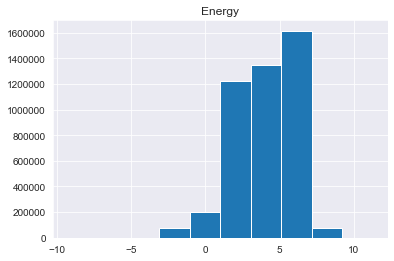

In [235]:
df[["Energy"]].hist()

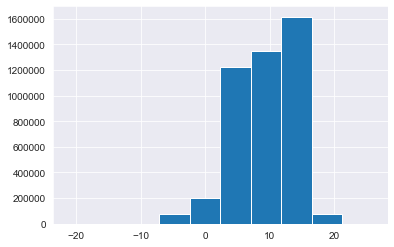

In [17]:
plt.hist(energy_ln)
plt.show()

In [18]:
for col in skewed_cols:
    log_values = np.log10(df[col].values)
    df[col] = log_values

In [23]:
df["Year"] = df["Year"].astype(int)

# Categorical Data

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our data variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

In [14]:
grouped_test = df[['MT', 'Data']].groupby(['MT'])

f_val, p_val = stats.f_oneway(grouped_test.get_group("1")['Data'], grouped_test.get_group('101')['Data'], grouped_test.get_group('102')['Data'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 15917.016298247428 , P = 0.0


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

In [354]:
def box_plot(x, dataframe=df, figsize=(8,6)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=x, y="Data", data=dataframe)

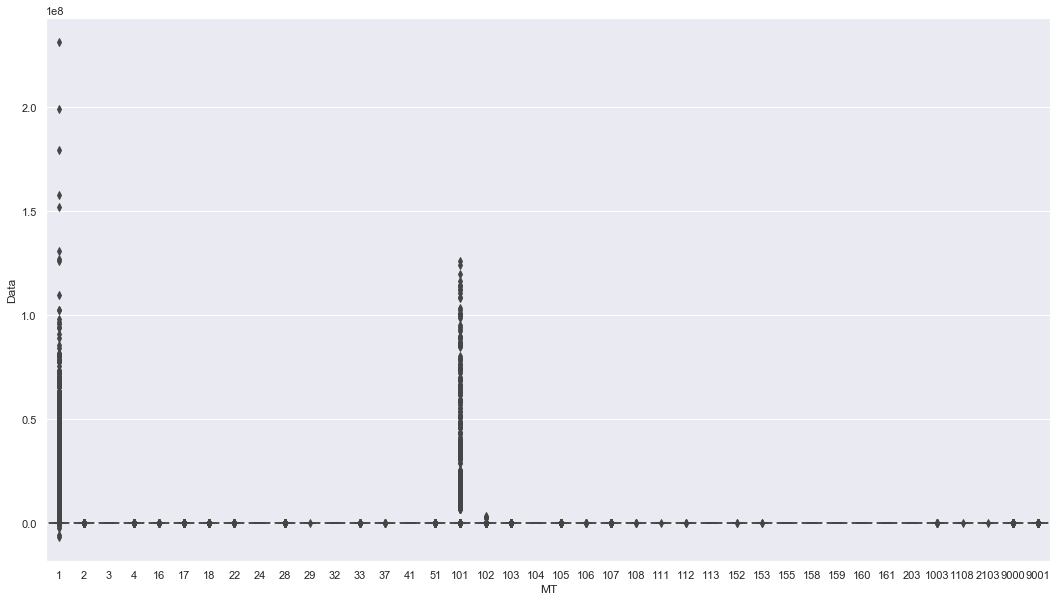

In [355]:
box_plot("MT", figsize=(18,10))

The values for other reaction types get squashed do the large magnitude of fission and total cross section data points (MT1 and MT101). Still it is noticable that these cross sections are magnitudes higher than other types. This feature will be helpful in determining limits to some reaction types (it will learn not to go above certan values.

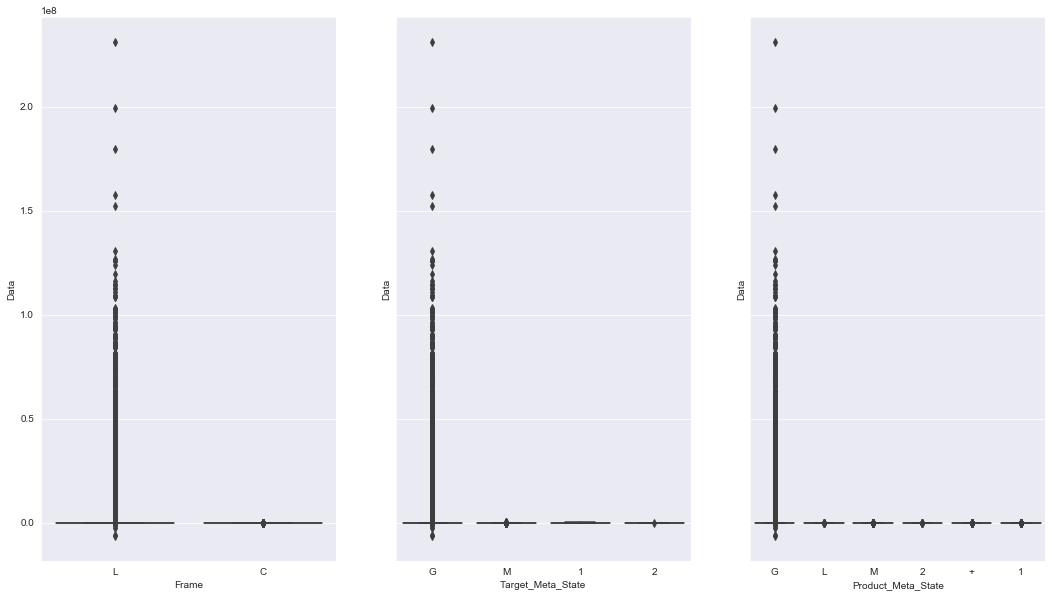

In [18]:
# call regplot on each axes
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(18,10))
sns.boxplot(x="Frame", y="Data", data=df, ax=ax1)
sns.boxplot(x="Target_Meta_State", y="Data", data=df, ax=ax2)
sns.boxplot(x="Product_Meta_State", y="Data", data=df, ax=ax3)